In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
'''train_df = pd.read_csv('data/Train.csv')
test_df = pd.read_csv('data/Test.csv')

# add a column to differentiate between the source of both data
train_df['source'] = 'train'
test_df['source'] = 'test'

# concatenate the two dataframes
df = pd.concat([train_df, test_df], ignore_index=True)
df
'''

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape

(8523, 12)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.Item_Weight.fillna(df.Item_Weight.mean() , inplace = True)

In [9]:
df.drop('Outlet_Size' , axis= 1, inplace= True)
df.drop('Outlet_Establishment_Year' , axis= 1, inplace= True)
df.drop('Item_Identifier' ,  axis= 1,inplace= True)
df.drop('Outlet_Identifier' ,  axis= 1, inplace= True)


In [10]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
print(df['Item_Fat_Content' ].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Type'].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat' ,  'reg': 'Regular'})

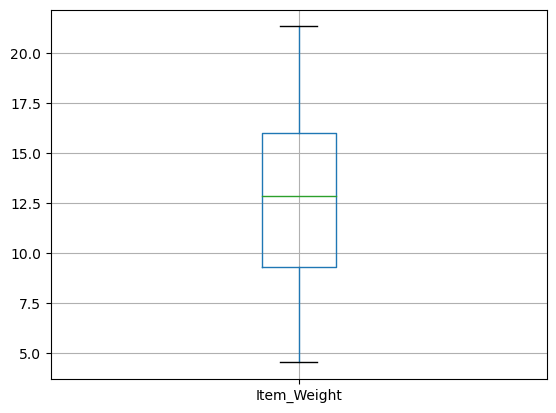

In [14]:
df.boxplot(column='Item_Weight')
plt.show()

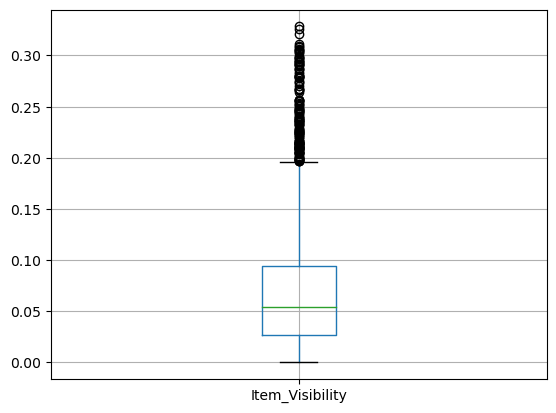

In [15]:
df.boxplot(column='Item_Visibility')
plt.show()

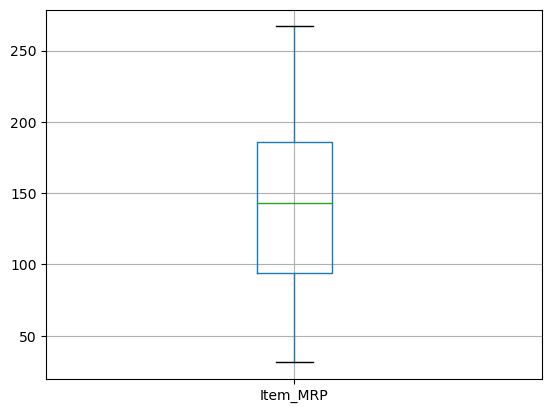

In [16]:
df.boxplot(column='Item_MRP')
plt.show()

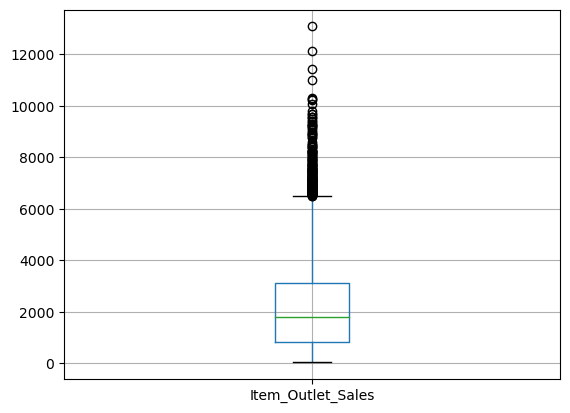

In [17]:
df.boxplot(column='Item_Outlet_Sales')
plt.show()

Lower bound: -2566.3261
Upper bound: 6501.8699
Number of outliers: 186


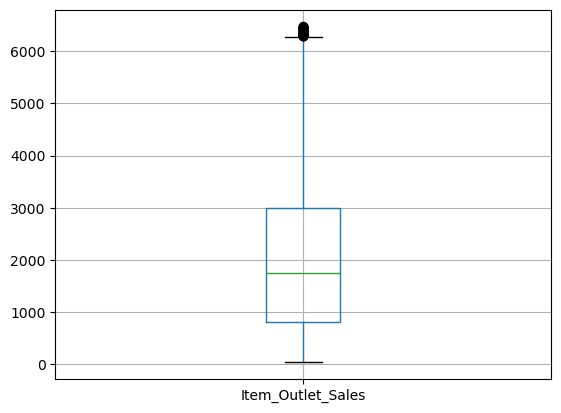

In [18]:
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)

# select the rows that contain outliers
outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]
print('Number of outliers:', len(outliers))

# remove the rows that contain outliers
df = df.drop(outliers.index)
df.boxplot(column='Item_Outlet_Sales')
plt.show()

Lower bound: -0.075377466
Upper bound: 0.197704638
Number of outliers: 141


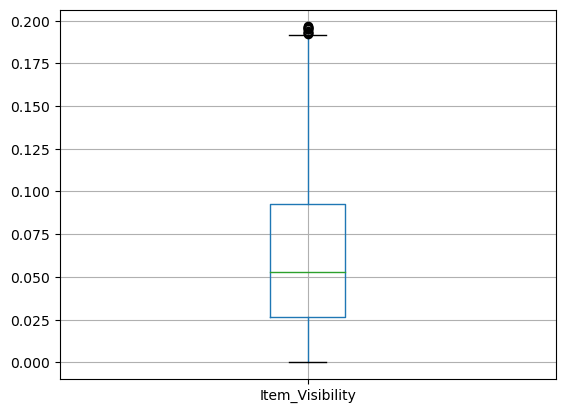

In [19]:
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)

# select the rows that contain outliers
outliers = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]
print('Number of outliers:', len(outliers))

# remove the rows that contain outliers
df = df.drop(outliers.index)
df.boxplot(column='Item_Visibility')
plt.show()

C:\Users\Omar\AppData\Local\Temp\ipykernel_16516\4091491144.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\Omar\AppData\Local\Temp\ipykernel_16516\4091491144.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


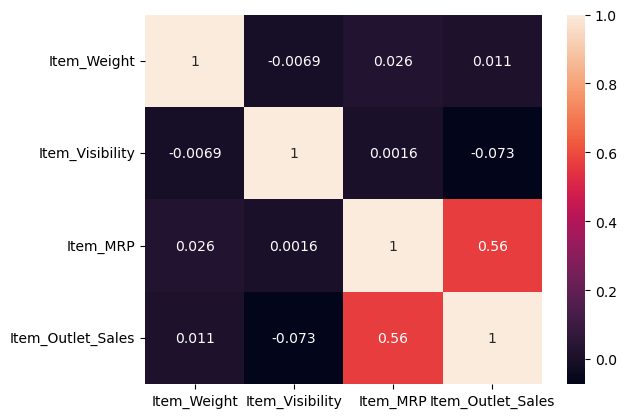

In [23]:
df.corr()
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [25]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the 'age' column
df['Item_Weight'] = scaler.fit_transform(df[['Item_Weight']])
df['Item_Visibility'] = scaler.fit_transform(df[['Item_Visibility']])
df['Item_MRP'] = scaler.fit_transform(df[['Item_MRP']])
df['Item_Outlet_Sales'] = scaler.fit_transform(df[['Item_Outlet_Sales']])
df['Item_Weight']

0      -0.835497
1      -1.627677
2       1.086358
3       1.484791
4      -0.922215
          ...   
8518   -1.406195
8519   -1.051120
8520   -0.530813
8521   -1.325336
8522    0.453552
Name: Item_Weight, Length: 8196, dtype: float64

In [27]:
dummies = pd.get_dummies(df[['Item_Fat_Content','Item_Type', 'Outlet_Location_Type' , 'Outlet_Type']], 
                            columns = ['Item_Fat_Content','Item_Type', 'Outlet_Location_Type' , 'Outlet_Type']
                             ,prefix=['Item_Fat_Content_','Item_Type_', 'Outlet_Location_Type_' , 'Outlet_Type_']
                             )
dummies
# drop the original 'fruit' column
df = df.drop(['Item_Fat_Content','Item_Type', 'Outlet_Location_Type' , 'Outlet_Type'], axis=1)

#concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummies], axis=1)


In [28]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content__Low Fat,Item_Fat_Content__Regular,Item_Type__Baking Goods,Item_Type__Breads,Item_Type__Breakfast,Item_Type__Canned,...,Item_Type__Snack Foods,Item_Type__Soft Drinks,Item_Type__Starchy Foods,Outlet_Location_Type__Tier 1,Outlet_Location_Type__Tier 2,Outlet_Location_Type__Tier 3,Outlet_Type__Grocery Store,Outlet_Type__Supermarket Type1,Outlet_Type__Supermarket Type2,Outlet_Type__Supermarket Type3
0,-0.835497,-1.018968,1.799306,1.096394,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,-1.627677,-0.949252,-1.476436,-1.095903,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1.086358,-1.003588,0.040814,0.005566,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.484791,-1.365235,0.698709,-0.903456,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-0.922215,-1.365235,-1.385543,-0.728747,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.406195,-0.139969,1.225760,0.459191,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,-1.051120,-0.351453,-0.503046,-1.025398,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8520,-0.530813,-0.605989,-0.877440,-0.596606,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,-1.325336,1.768322,-0.584701,-0.162048,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# split the data into features (X) and target variables (y)
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [31]:

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [33]:
# create a linear regression model
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, y_train)

# evaluate the model on the test data
score = model.score(X_test, y_test)


# print the coefficient and intercept of the model

# print the R-squared score of the model
print('R-squared:', score)


R-squared: 0.5599909900738517


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [43]:
# define a range of values for the number of trees
n_trees_range = np.arange(1, 201, 10)

# create empty lists to store the accuracy scores for each value of n_trees
train_scores = []
test_scores = []

# loop over the range of values for n_trees and fit a model for each value
for n_trees in n_trees_range:
    # create a random forest classifier with n_trees trees
    rfr = RandomForestRegressor(n_estimators=n_trees, random_state=42)

    # fit the model on the training data
    rfr.fit(X_train, y_train)

    # calculate the accuracy scores for the training and testing data and append to the lists
    test_accuracy = rfr.score(X_test,y_test)


    test_scores.append(test_accuracy)



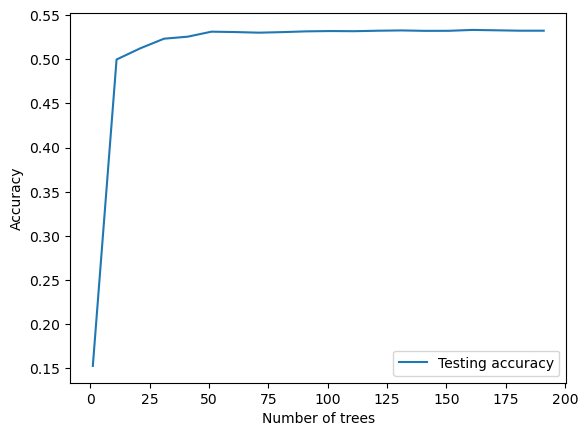

In [45]:
# plot the accuracy scores as a function of the number of trees
plt.plot(n_trees_range, test_scores, label='Testing accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

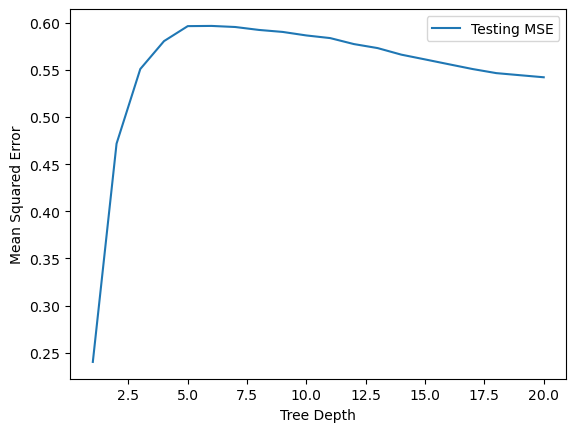

In [50]:
train_mse = []
test_mse = []

depth_range = np.arange(1, 21)

# loop over the range of values for the tree depth and fit a model for each value
for depth in depth_range:
    # create a random forest regressor with a tree depth of depth
    rfr = RandomForestRegressor(n_estimators=100 , max_depth=depth, random_state=42)

    # fit the model on the training data
    rfr.fit(X_train, y_train)

    # make predictions on the training and testing data

    # calculate the mean squared error for the training and testing data and append to the lists
    test_accuracy = rfr.score(X_test,y_test)
    test_mse.append(test_accuracy)

# plot the mean squared error as a function of the tree depth
plt.plot(depth_range, test_mse, label='Testing MSE')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [57]:
xgb = XGBRegressor(random_state=42)

# define the hyperparameter grid to search over
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200]}

# perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# use the best hyperparameters to fit the model on the training data
xgb_best = grid_search.best_estimator_
xgb_best.fit(X_train, y_train)

# make predictions on the testing data using the best model
y_pred = xgb_best.predict(X_test)

# calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# print the best hyperparameters and mean squared error of the model
print("Best hyperparameters:", grid_search.best_params_)
print("Mean Squared Error: %.2f" % mse)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 0.39
